# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
#Importing basic modeles for EDA and Data validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I will import data and display basic information about dataset.

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv')

In [3]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


# Data Validation

After first look, I see there are null values and wrong value type for servings column. To clear this I will check every column.  

### High_traffic
First of all, I will check High_traffic column, because this is depend value.

In [6]:
df.high_traffic.unique()

array(['High', nan], dtype=object)

This values cannot be used by machine learning models so I will replace 'High' value with 1 and nan values with 0.

In [7]:
df.high_traffic.replace(['High', np.nan], [1,0], inplace = True)

In [8]:
df.high_traffic.info()

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: high_traffic
Non-Null Count  Dtype  
--------------  -----  
947 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB


After replacing values there is no null values and data type is correct, so no more cleaning is needed. 

### Category
There is 11 categories, which is wrong, because in instruction I have information about 10 categories. "Chicken Breast" is additional category, so I will replace this with "Chicken" value.

In [9]:
print(df.category.unique())

df.category.replace('Chicken Breast','Chicken', inplace = True)

print(df.category.unique())

['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken'
 'Lunch/Snacks' 'Vegetable' 'Meat' 'Dessert']


### Recipe
There are no null values. I will check if every row is unique. 

In [10]:
len(df.recipe.unique())

947

Number of unique values is equal to number of rows, so there is no duplicates in this column. 

### Calories, Carbohydrate, Sugar, Protein
All null values at these columns, are connected to each other (when one of the column has null value, rest of these columns also have null value at this row), so I will replace null values with mean value of each column, groubed by category.


In [11]:
df[df.isna().any(axis = 1)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,1.0
23,24,NaN,NaN,NaN,NaN,Meat,2,0.0
48,49,NaN,NaN,NaN,NaN,Chicken,4,0.0
82,83,NaN,NaN,NaN,NaN,Meat,4,1.0
89,90,NaN,NaN,NaN,NaN,Pork,6,1.0
116,117,NaN,NaN,NaN,NaN,Chicken,6,1.0
121,122,NaN,NaN,NaN,NaN,Dessert,2,1.0
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,1.0
149,150,NaN,NaN,NaN,NaN,Potato,2,1.0
187,188,NaN,NaN,NaN,NaN,Pork,4,1.0


In [12]:
for column in ['calories','carbohydrate','sugar','protein']:    
    df[column].fillna(df.groupby('category')[column].transform("mean"), inplace = True)

In [13]:
df[['calories','carbohydrate','sugar','protein']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      947 non-null    float64
 1   carbohydrate  947 non-null    float64
 2   sugar         947 non-null    float64
 3   protein       947 non-null    float64
dtypes: float64(4)
memory usage: 29.7 KB


There are no-null values, so more cleaning is not needed. 

### Servings
There are 2 wrong unique values (there should be no string values), I will replace them with corrected values. Value type should be also numeric, so after replacing values I will change type to 'int'.

In [14]:
df.servings.unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [15]:
df.servings.replace(['4 as a snack', '6 as a snack'], ['4', '6'], inplace = True)
df.servings = df.servings.astype('int')
df.servings.unique()

array([6, 4, 1, 2])

In [16]:
df.servings.info()

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: servings
Non-Null Count  Dtype
--------------  -----
947 non-null    int32
dtypes: int32(1)
memory usage: 3.8 KB


## Data Validation - summary

Dataset **recipe_site_traffic_2212** contains **947** rows and **8** features. No entries were deleted during cleaning. To created model I used all features except recipe ID. 

<table>
    <tr>
        <th>Feature</th>
        <th>Validation</th>
    </tr>
    <tr>
        <th>recipe</th>
        <th>There is 947 unique values, it means there is no duplicated values, as expected. Cleaning is not needed.</th>
    </tr>
    <tr>
        <th>calories</th>
        <th>Variable type is correct. There were null values, I replaced them with corresponding mean value, grouped by category.</th>
    </tr>
    <tr>
        <th>carbohydrate</th>
        <th>The same situation and cleaning steps as calories column.</th>
    </tr>
    <tr>
        <th>sugar</th>
        <th>The same situation and cleaning steps as calories column.</th>
    </tr>
    <tr>
        <th>protein</th>
        <th>The same situation and cleaning steps as calories column.</th>
    </tr>
    <tr>
        <th>category</th>
        <th>There is no null values, variable type is correct. There ware 11 unique values, but there should be 10. I find and replace wrong category 'Chicken Breast' with 'Chicken', after that there were 10 categories, as expected.</th>
    </tr>
    <tr>
        <th>servings</th>
        <th>Wrong variable type, wrong unique values. I replaced wrong values like '4 as a snack' with corresponding numeric value (from '4 as ...' to 4) and changed variable type to 'int'.</th>
    </tr>
    <tr>
        <th>high_traffic</th>
        <th>I change 'High traffic' values to 1,  and low traffic values (which were displayed as null) with 0. After cleaning there was no null values, there was no need to change variable type, becouse it was suitable for model.</th>
    </tr>


# EDA

I will continue exploring basic characteristic of features and relationship with high_traffic to have better view on dataset. 

### Distribution of categories

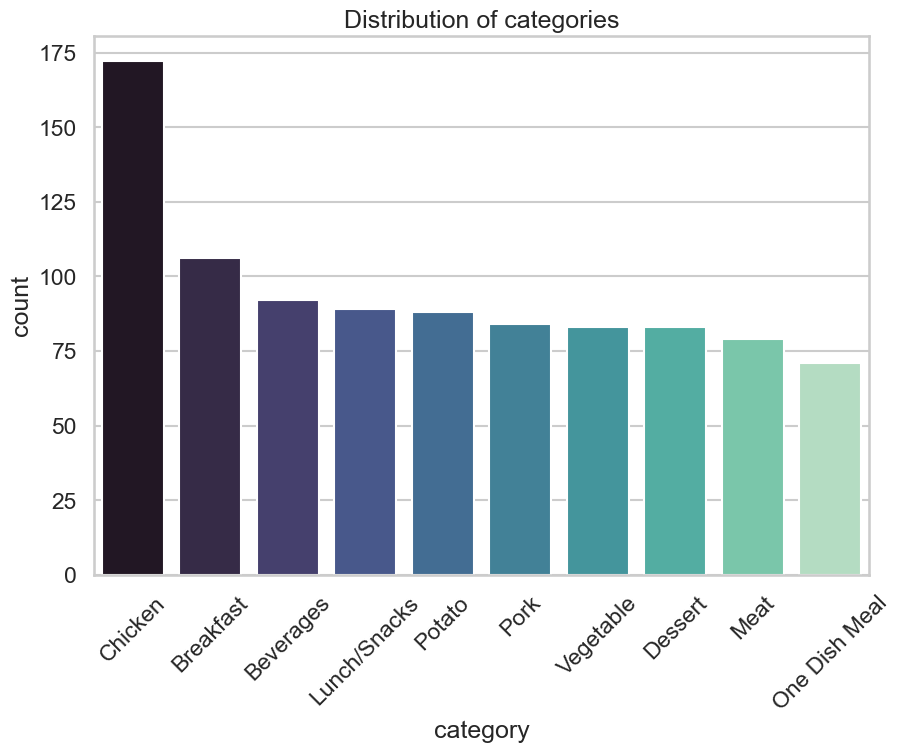

In [17]:
# I will use seaborn with talk context and whitegrid style
sns.set_context("talk")
sns.set_style('whitegrid')

plt.figure(figsize=(10,7))
sns.countplot(x = df['category'], palette = 'mako', order = df['category'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Distribution of categories')
plt.show()

Most of the categories are present in similar numbers, except "Chicken", which is most popular category.

### Distribution of servings

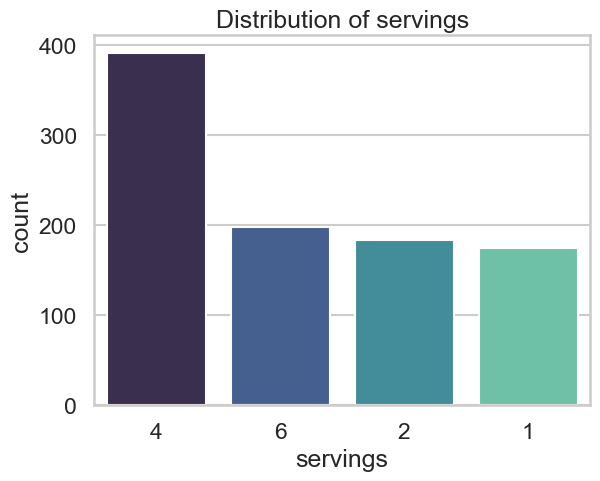

In [18]:
sns.countplot(x = df['servings'], palette = 'mako', order = df['servings'].value_counts().index)
plt.title('Distribution of servings')
plt.show()

Serving with value 4 is much more popular than other servings values.

### Percentage of high and low traffic recipes 

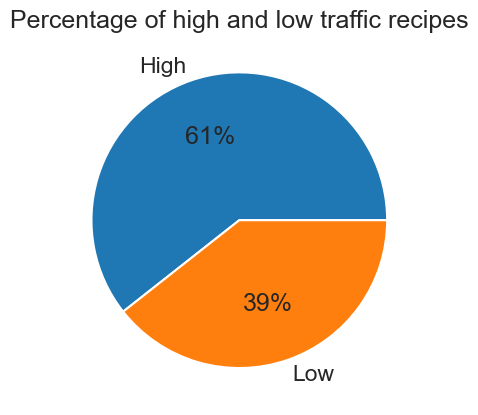

In [19]:
plt.pie(df.high_traffic.value_counts().values, labels = ['High','Low'], autopct='%.0f%%')
plt.title('Percentage of high and low traffic recipes')
plt.show()

Most of recipiec has high traffic, it can be harmfull to the model because of class imbalance.

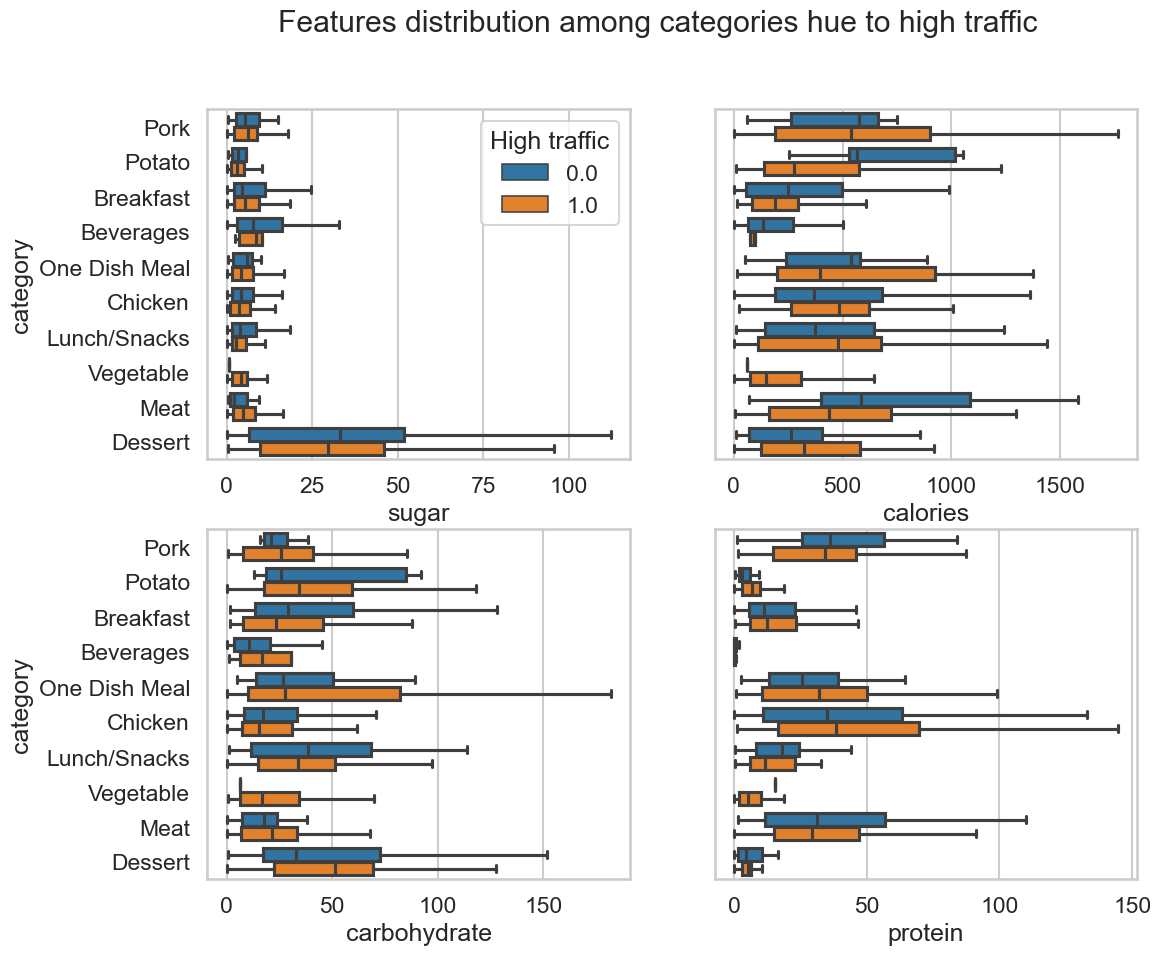

In [20]:
fig, axes = plt.subplots(2,2,figsize=(12,10), sharey = 'row')
ax1 = sns.boxplot(data = df, x = 'sugar', y = 'category', hue = 'high_traffic', showfliers = False, ax = axes[0,0])
ax1.legend( title = 'High traffic')

ax2 = sns.boxplot(data = df, x = 'calories', y = 'category', hue = 'high_traffic', showfliers = False, ax = axes[0,1])
ax2.set_ylabel(None)
ax2.get_legend().remove()

ax3 = sns.boxplot(data = df, x = 'carbohydrate', y = 'category', hue = 'high_traffic', showfliers = False, ax = axes[1,0])
ax3.get_legend().remove()

ax4 = sns.boxplot(data = df, x = 'protein', y = 'category', hue = 'high_traffic', showfliers = False, ax = axes[1,1])
ax4.set_ylabel(None)
ax4.get_legend().remove()

fig.suptitle("Features distribution among categories hue to high traffic")
plt.show()

We can clearly see that distribution of sugar, calories, carbohydrate or protein values for some categories varies based on high or low traffic value. 

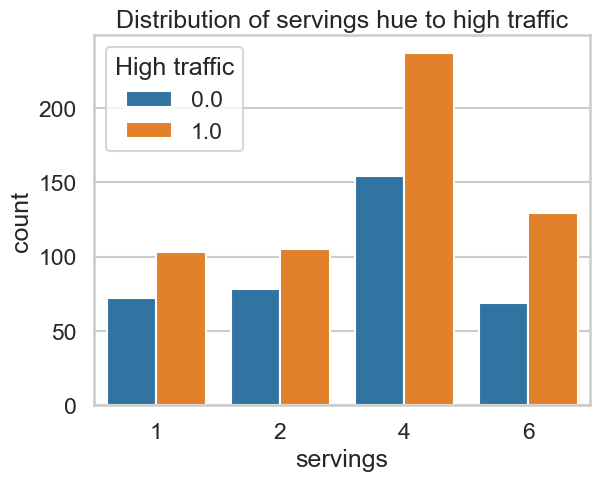

In [21]:
sns.countplot(data = df, x = 'servings',  hue = 'high_traffic')
plt.legend( title = 'High traffic')
plt.title('Distribution of servings hue to high traffic')
plt.show()

For 4 and 6 servings, there is bigger difference than in 1 and 2 servings, between high and low traffic, in favor of the high traffic recipiec.

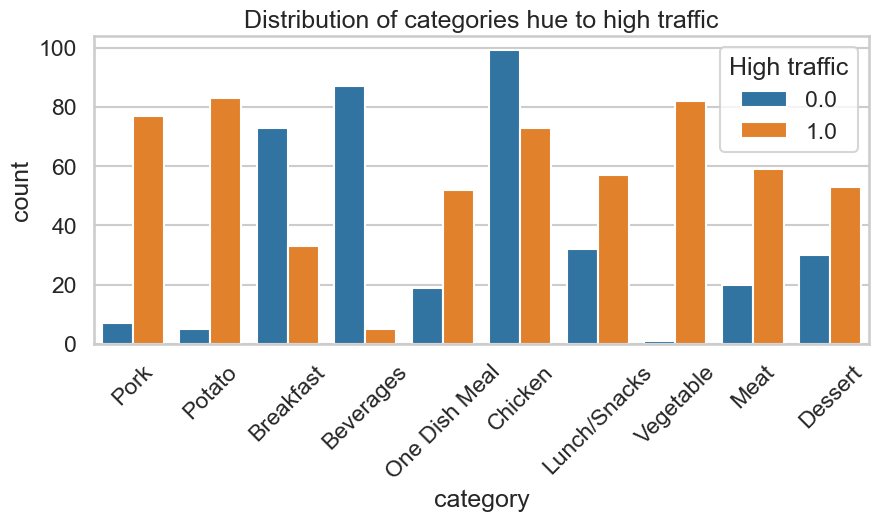

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = 'category',  hue = 'high_traffic')
plt.xticks(rotation = 45)
plt.legend( title = 'High traffic')
plt.title('Distribution of categories hue to high traffic')
plt.show()

We can clearly see that some categories are much more popular than others. Category like Pork, Potato or Vegetable have nearly only high traffic recipies. This relationship can be very usefull with prediction of high or low traffic.

### EDA - summary
I found that many categories are more popular than others and also sometimes high traffic recipiec has different distribution of numeric features than low traffic recipies. 

There is 61% of high traffic recipies. This value can be used as buisness metric, so it will be important to measure this metric. 

# Model Development

This is clearly **classification** problem, because we need to predict if new recipe will be in high traffic or low traffic group.
For baseline model I will use simplest **logistic regression**, and for comparision I will use **Radnom Forest classifier**, which is more complicated, but also more efficient. 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

First I will prepare dataset.

In [24]:
X = df.drop(columns = ['high_traffic','recipe']).copy()
y = df['high_traffic'].copy()

One the pie chart, we can see that there is class imbalance, which can be harmfull for model. I will use **RandomOverSampler** with auto strategy, to reduce this problem. 

In [25]:
oversample = RandomOverSampler(sampling_strategy='auto')
X, y = oversample.fit_resample(X, y)

## Baseline model - logistic regression

To prepare data particulary for logistic regression, I will standarize numeric features and then use One Hot encoding (with drop first = True option for pandas.get_dummies).

In [26]:
numeric = ['calories','carbohydrate','sugar','protein','servings']

# to use StandardScaler I need to extract numeric features and add them again after standarization.
Xscaled = X[numeric].copy()
scaler_log = preprocessing.StandardScaler().fit(Xscaled)
Xscaled  = pd.DataFrame(scaler_log.transform(Xscaled))
Xscaled.columns = numeric  #to easy replace columns in pandas, they need to have the same column names

Xlog = X.copy()
Xlog[numeric] = Xscaled[numeric]

Xlog = pd.get_dummies(Xlog, drop_first = True)

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, y , test_size = 0.2, random_state = 42)

In [27]:
lr = LogisticRegression(multi_class='multinomial', solver='sag')
lr.fit(Xlog_train, ylog_train)

ylog_pred = lr.predict(Xlog_test)
ylog_pred_train = lr.predict(Xlog_train)

In [28]:
train_log_accuracy = accuracy_score(ylog_train, ylog_pred_train )
test_log_accuracy = accuracy_score(ylog_test, ylog_pred)
print("Train_accuracy:", train_log_accuracy)
print("Test_accuracy:", test_log_accuracy)

Train_accuracy: 0.7559912854030502
Test_accuracy: 0.7260869565217392


Model works but has too small acuracy to be used in production. There is also no overfitting. I will check how it works compare to next model. 

## Comparision model - Random Forest classifier

Data for Random Forest don't need to be standarizated, so I will only use One Hot encoding (I will keep all columns, because using drop_first could be harmfull for forest models). I will create first model with default parameters and then create second with parameter tunnig.

### Preparing data

In [29]:
X = pd.get_dummies(X, drop_first = False)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

### Model with default parameters

In [30]:
rf = RandomForestClassifier(random_state = 6).fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train )
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_accuracy:", train_accuracy)
print("Test_accuracy:", test_accuracy)

Train_accuracy: 0.9967320261437909
Test_accuracy: 0.7913043478260869


Model with defalut parameters is effective and has required accuracy. Train accuracy is much higher than test accuracy, so model is overfitting, I will check if with parameter tunning can reduce this problem and make accuracy even higher. 

### Model tuning with RandomizedSearchCV

I will use RandomizedSearchCV to find best parameters for max_depth and n_estimators to check if it will improve model and reduce overfitting. 

In [31]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf2 = RandomForestClassifier(random_state = 6)

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist,
                                 n_iter=40, 
                                 cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6),
                   n_iter=40,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C8FFAAB580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C901C13520>})

In [32]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 430}


In [33]:
yrand_pred = best_rf.predict(X_test)
yrand_pred_train = best_rf.predict(X_train)

train_rand_accuracy = accuracy_score(y_train, yrand_pred_train )
test_rand_accuracy = accuracy_score(y_test, yrand_pred)
print("Train_accuracy:", train_rand_accuracy)
print("Test_accuracy:", test_rand_accuracy)


Train_accuracy: 0.9967320261437909
Test_accuracy: 0.8


Model has accuracy close around 80%, using RadnomizedSearchCV did not improve default model or reduce problem of overfitting. In this situation, I can use RadnomizedSearchCV with more parameters and iteraion, but it would be very computationally expensive and still it have chance to not imporove model. Also ,adding more data should be more helpfull to reduce overfitting.

Overall model with default parameters is more sufficient so I will use it to model evaluation, because **with my tools it would take too much time** to check if RandomizedSearchCV or GridSearchCV would help in tuning the model.

# Model evaluation 

For model evaluation I will compare Logistic Regression and Random Forest with default parameters. In this situation, simple **model accuracy** will be sufficient metric to compare these models, but I will also check precision, recall and f1-score. 

### Logistic Regression evaluation

In [34]:
print("Train_accuracy:", train_log_accuracy)
print("Test_accuracy:", test_log_accuracy)

precision = precision_score(ylog_test, ylog_pred)
recall = recall_score(ylog_test, ylog_pred)
f1 = f1_score(ylog_test, ylog_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Train_accuracy: 0.7559912854030502
Test_accuracy: 0.7260869565217392
Precision: 0.768595041322314
Recall: 0.7265625
F1: 0.746987951807229


**Model did not reach requaired accuracy of 80%.**

### Random Forest evaluation

In [35]:
print("Train_accuracy:", train_accuracy)
print("Test_accuracy:", test_accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Train_accuracy: 0.9967320261437909
Test_accuracy: 0.7913043478260869
Precision: 0.8389830508474576
Recall: 0.7734375
F1: 0.8048780487804877


**Model reach requaired accuracy of 80%.**

### Summary
Logistic Regression has worse accuracy, precision, recall and f1-score than Random Forest. There is no reason to use this approach. RF model is better and has sufficient accuracy. Recall for Random Forest is little bit smaller than 0.8, but overall f1-score is good enough. 

# Buisness metrics

Main goal of my work is to predict whether a recipe will have high or low traffic and thus increase overall percentage of high traffic recipes displayed. Based on data, overall percentage is **61%** of high traffic recipes. This value can by used as **KPI**, so company should monitor percentage of high and low traffic recipes in following weeks. If, in following weeks, company will increase this value, by using my model, to value of **80%**, it will indicate that model is working and company can achieve its business goal. 

To reach goal of 80%, model should have at least 0.8 accuracy. When we compare Logistic Regression and Random Forest, we can see that LR statistically has low chance to reach this value in long term (becouse of 0.72 accuracy) , much higher chances has RF (with accuracy 0.81), so company should use this approach.


# Recommendation

After my analysis and model development I have following recommendations:
* Company can use my created model to predict if recipe will be high or low traffic. 
> Random Forest model with default parameters and prepared dataset, will make correct prediction 80% of time, thus it can reach business goal.


> Model can be improved by adding more data, so with time company should collect and provide bigger datasets to increase accuracy of model.

* Some categories are unpopular, so company should redesign these recipes to check if they have a chance to get high traffic.

* Better data collection in numeric features.